<a href="https://colab.research.google.com/github/KauanIzidoro/polynomial-regression/blob/main/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Application of __Polynomial Regression__ to stress-strain curve interpolation to determine the tenacity modulus

See the full documentation in the following repository: [polynomial-regression](https://github.com/KauanIzidoro/polynomial-regression)


### Student:

<img src="https://media.discordapp.net/attachments/1317159100529770570/1317159189520584734/38a6f0f2-a02d-4017-be29-787f12ecef46.jpg?ex=675dab96&is=675c5a16&hm=7de955e72eade61c25d9ef76a9ba6a24a4f80bc742a8f470e7af05c9e601a408&=&format=webp&width=676&height=676" width="100" style="float: left; margin-right: 5px;" border="5px" />

  __Kauan H. S. Izidoro__ <br>
  [Faculade SENAI Sorocaba](https://sp.senai.br/unidade/sorocaba/) <br>

  


#Glossary:
1. Preparing the data
2. Train Model with Polynomial Regression
3. Validation the Model


# 1. Preparing the dataset

### 1.1 Imports


In [63]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

### 1.2 Data loading and visualization

In [85]:
stretching_test_data = pd.read_csv('/content/stretching-test.csv')
stretching_test_data.head(15)

,deformation,tension
0,0.237891,251.784751
1,0.514648,723.294811
2,0.779687,1108.488402
3,1.041211,1482.472761
4,1.301953,1840.834468
5,1.562304,2182.074728
6,1.823047,2516.442108
7,2.083398,2833.535712
8,2.343554,3135.306786
9,2.604101,3418.238192


In [86]:
stretching_test_data.describe()

,deformation,tension
count,1484.000000,1484.000000
mean,193.359274,4723.852127
std,111.598385,648.133426
min,0.237891,251.784751
25%,96.809797,4375.623899
50%,193.359438,4424.649832
75%,289.908805,5062.479984
max,386.339063,6957.856143


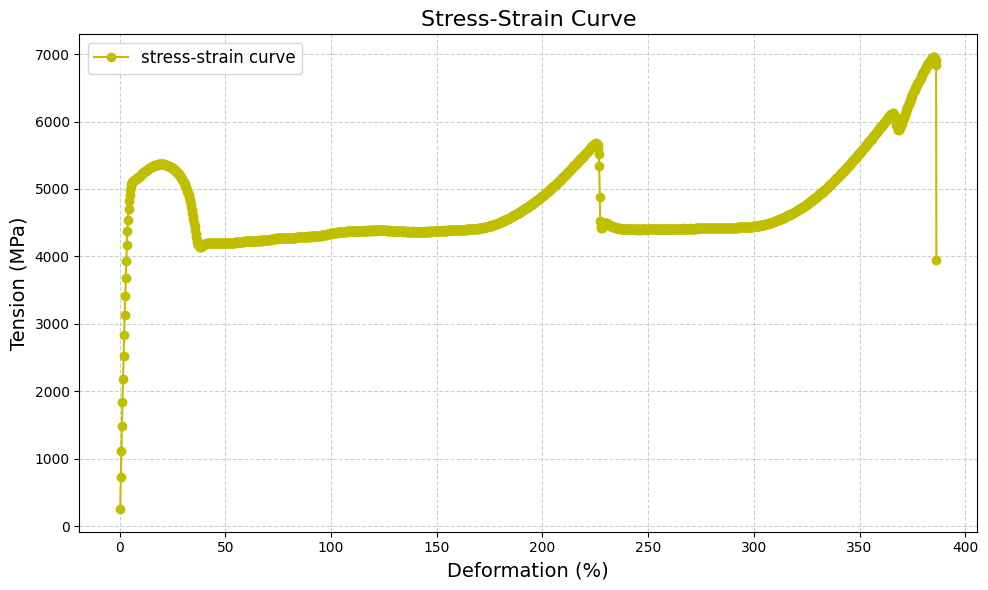

In [87]:
deformation = stretching_test_data["deformation"]
tension = stretching_test_data["tension"]

plt.figure(figsize=(10, 6))
plt.plot(deformation, tension, marker='o', linestyle='-', color='y', label="stress-strain curve")

plt.title("Stress-Strain Curve", fontsize=16)
plt.xlabel("Deformation (%)", fontsize=14)
plt.ylabel("Tension (MPa)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.tight_layout()

plt.show()

# 2. Train Model with Polynomial Regression

In [130]:

scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()


x = scaler_x.fit_transform(stretching_test_data["deformation"].values.reshape(-1, 1))
y = scaler_y.fit_transform(stretching_test_data["tension"].values.reshape(-1, 1))


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

DEGREE = 9

p_features = PolynomialFeatures(degree=DEGREE)
p_x_train = p_features.fit_transform(x_train)
p_x_test = p_features.transform(x_test)

model = LinearRegression()
model.fit(p_x_train, y_train)

y_predict = model.predict(p_x_test)





### 2.1 Model plot

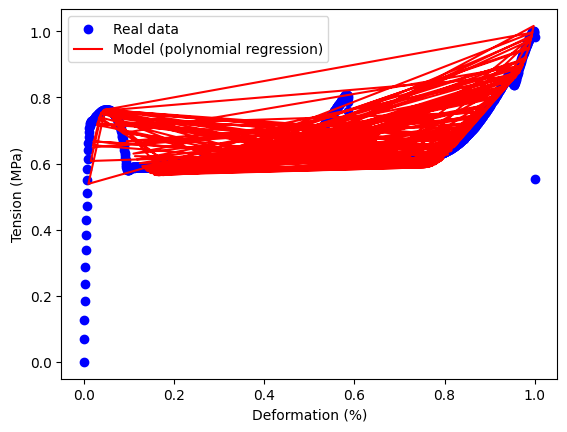

In [132]:
plt.scatter(x, y, color="blue", label="Real data")
plt.plot(x_test, y_predict, color="red", label="Model (polynomial regression)")
plt.xlabel("Deformation (%)")
plt.ylabel("Tension (MPa)")
plt.legend()
plt.show()

# 3. Validation the model

## 3.1 Mean Squared Error (MSE)
The Mean Squared Error is the average of the squared differences between the actual values $yi$​ and the predicted values $\hat{y}_i$​. It measures how well the regression line fits the data.

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

Where:

* $yi​$ = actual values,<br>
* $\hat{y}_i$ = predicted values,<br>
* $n$ = number of data points.<br><br>

MSE is sensitive to outliers because it squares the errors, giving larger penalties to larger errors.

## 3.2 Root Mean Squared Error (RMSE)
The Root Mean Squared Error is simply the square root of MSE. It is easier to interpret because it has the same units as the dependent variable $y$.

$$\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

RMSE gives a more intuitive sense of how far off, on average, the predictions are from the actual values.


## 3.3 Mean Absolute Error (MAE)
The Mean Absolute Error is the average of the absolute differences between the actual values $yi$​ and the predicted values $\hat{y}_i$. Unlike MSE, it does not square the errors, so it's less sensitive to outliers.

$$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y_i - \hat{y}_i|
$$

MAE is often preferred when the model needs to handle outliers better or when the errors need to be interpreted in their original scale.


## 3.4 Coefficient of Determination (R² Score)
The R² Score measures the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, where 1 indicates a perfect fit.

$$R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$

Where:<br>
* $\bar{y}$ is the mean of the actual values.<br><br>

An R² of 1 indicates the model explains all the variability, while an R² of 0 means the model explains none of the variability.